## Prediction using Unsupervised Machine learning

### TASK 2: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Name-Abhijeet Singh

In [1]:
#Import libraries
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from sklearn import datasets

In [2]:
#Load the Dataset
df=datasets.load_iris()
Data=pd.DataFrame(df.data, columns = df.feature_names)

In [3]:
Data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
Data.shape

(150, 4)

In [5]:
#Data pre-processing
x=Data.iloc[:,[0,1,2,3]].values

#### Elbow Method

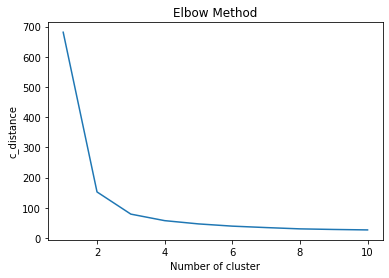

In [6]:
#Find the optimal number of cluster with the help of Elbow method
from sklearn.cluster import KMeans
c_distance=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    c_distance.append(kmeans.inertia_)
plt.plot(range(1,11),c_distance)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('c_distance')
plt.show()

#### You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (c_distance) doesn't decrease significantly with every iteration.



#### From this we choose the number of clusters as 3 

In [7]:
# Fitting KMeans to the dataset
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0, max_iter = 300, n_init = 10,)
y_kmeans=kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


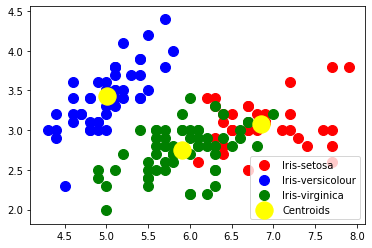

In [8]:
# Visualising the clusters 
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 300, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()